In [45]:
# libraries:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML model libraries:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# libraries for model improvement
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [49]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data procesing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
data['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

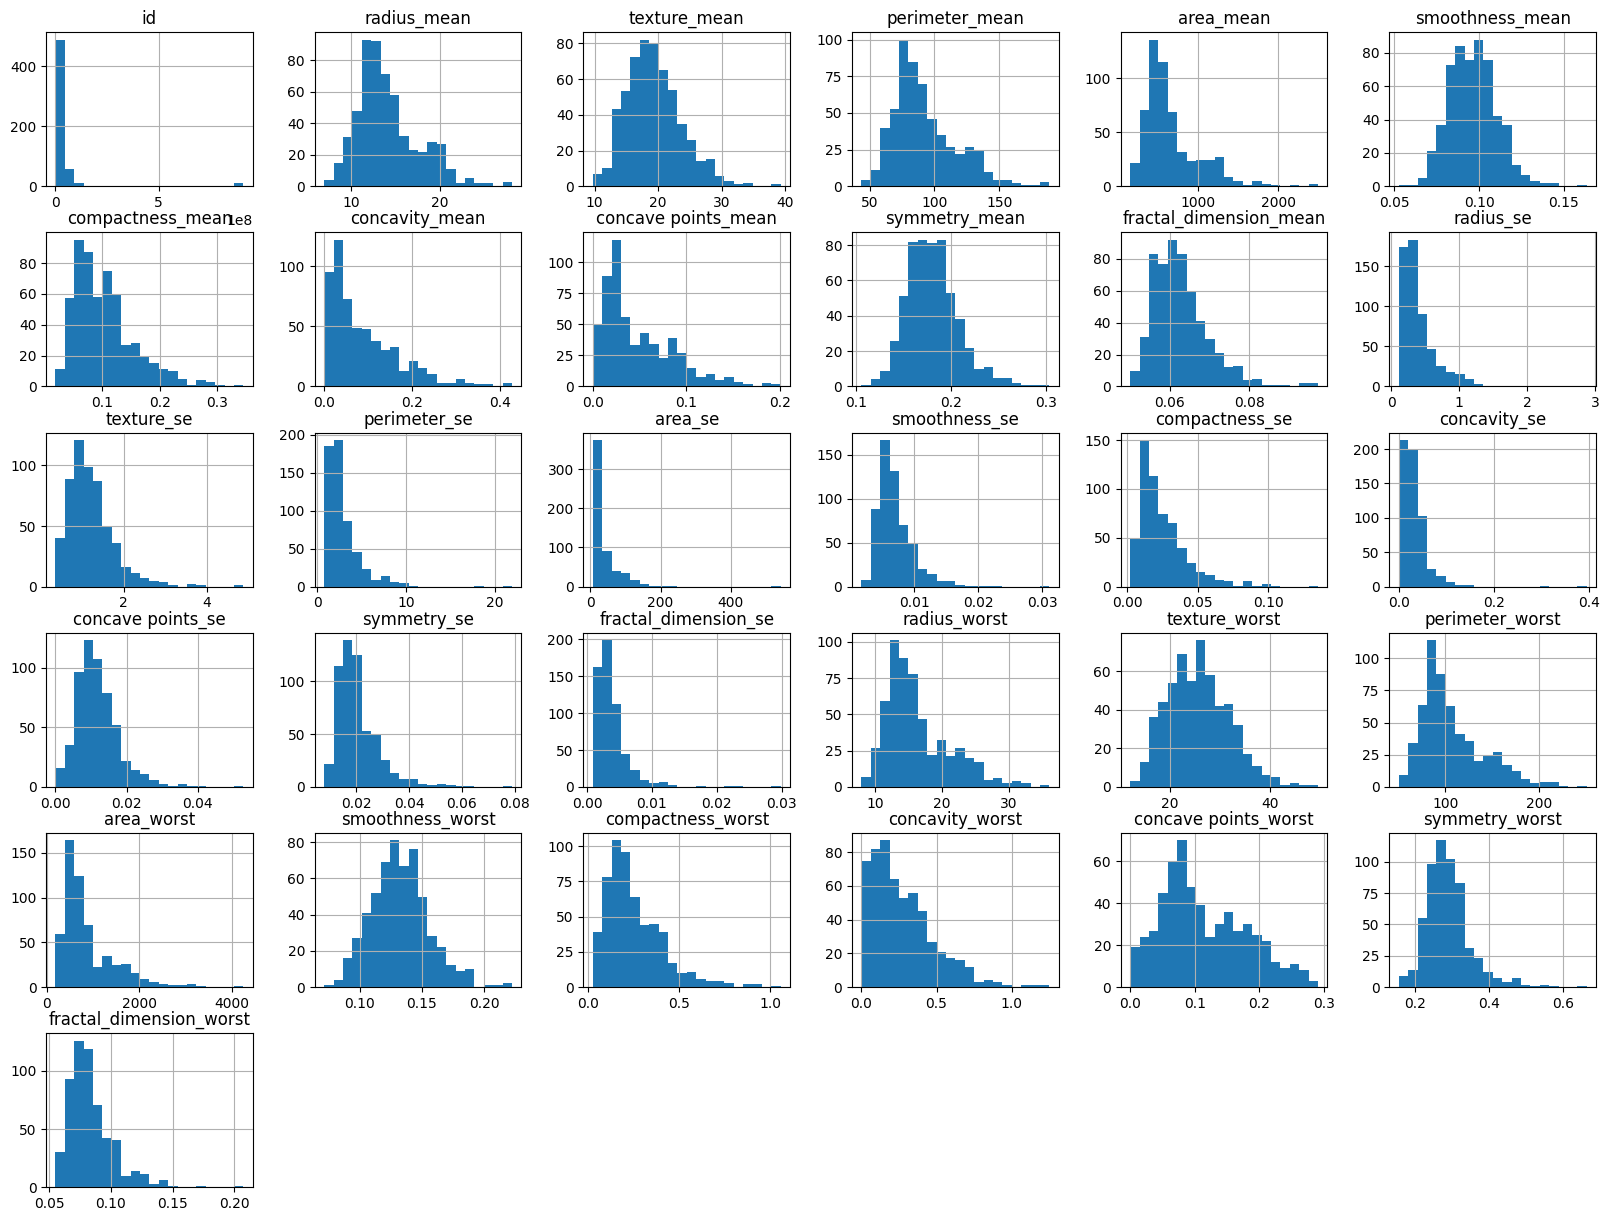

In [17]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

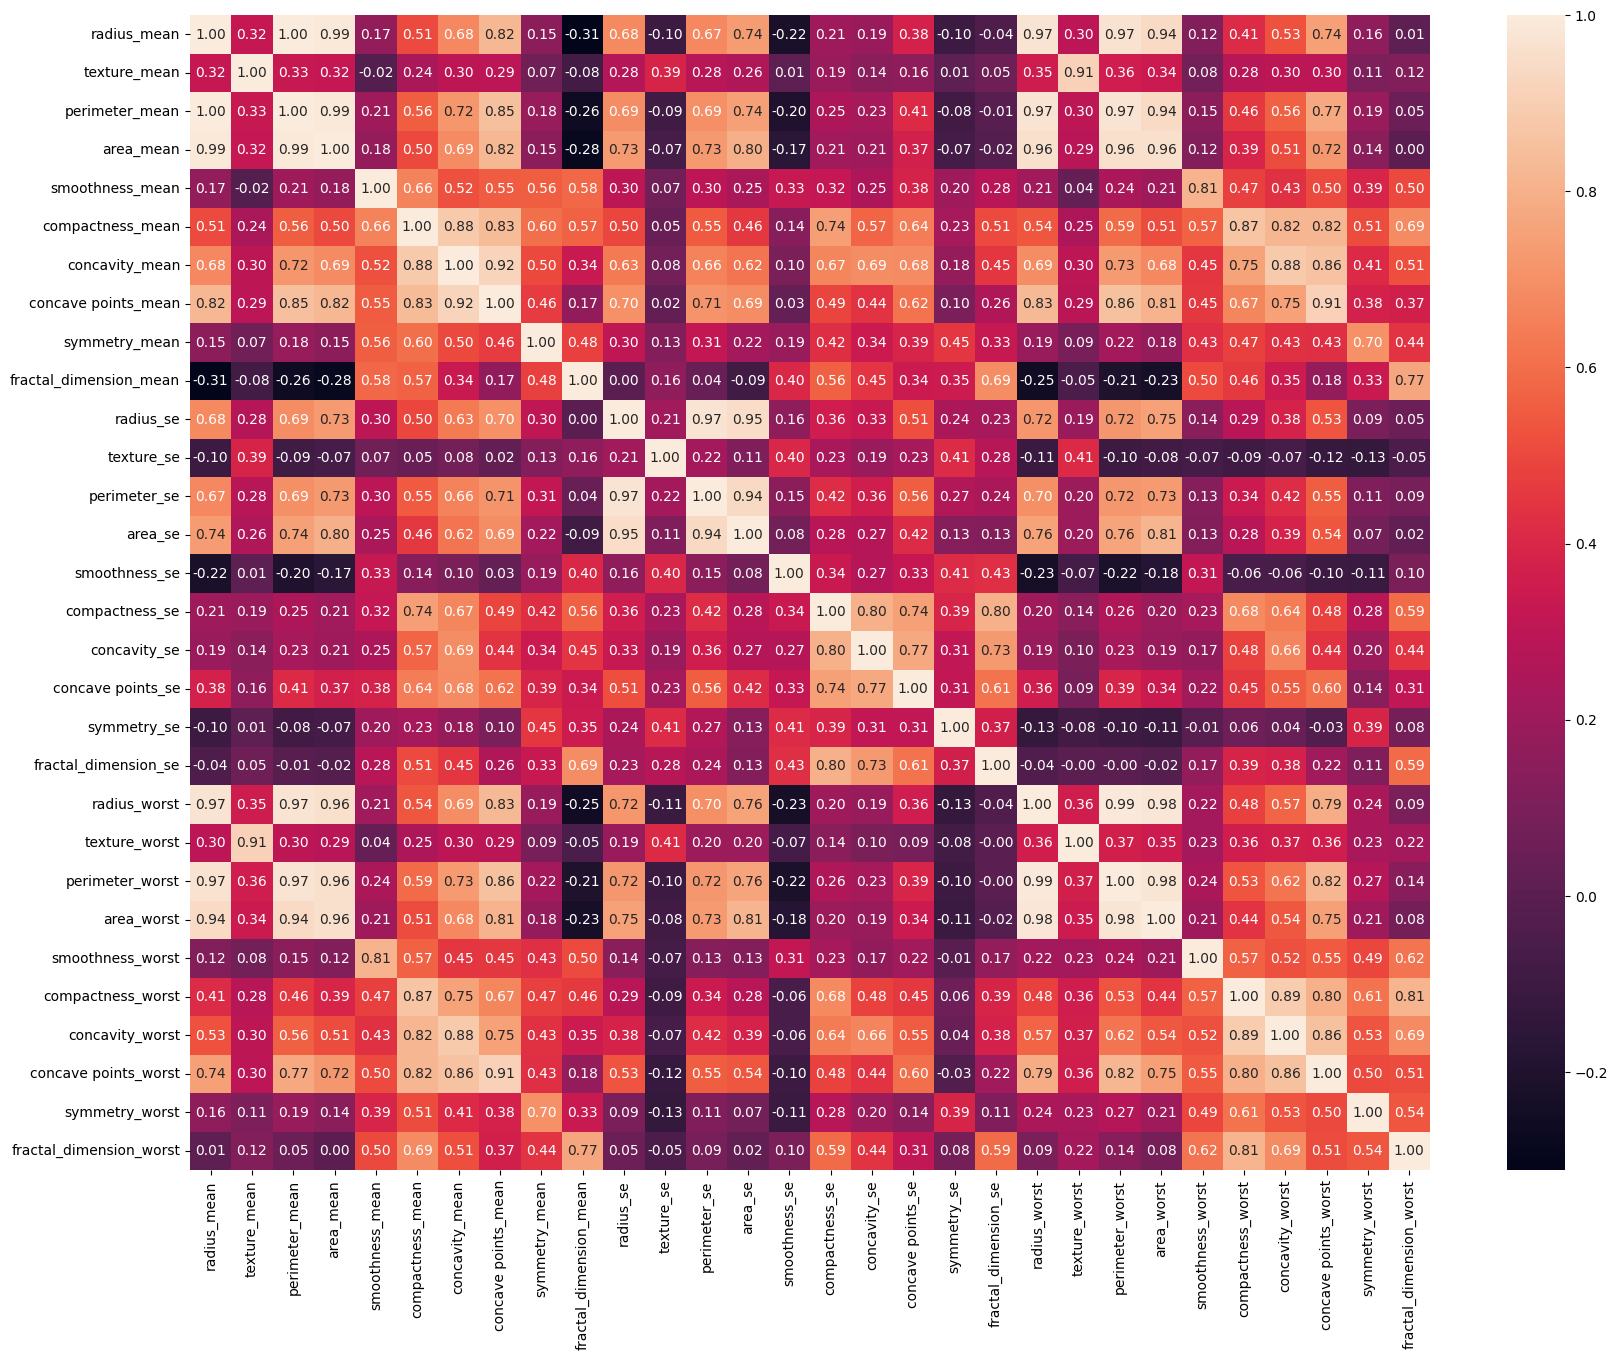

In [21]:
numeric_data = data.drop(['id', 'diagnosis'], axis=1)

# correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.show()

In [7]:

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [8]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [9]:
# 'id' column is dropped here as its not a feature for prediction
features = data.drop(['id'], axis=1)
target = features.pop('diagnosis')

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)


In [11]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (398, 30)
Test set shape: (171, 30)


# ML modelle

In [13]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Decision Tree Classifier
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [14]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Support Vector Machine
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Support Vector Machine (SVM)")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Random Forest Classifier
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Support Vector Machine (SVM)
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Hyperparameter tuning

In [27]:


# parameter grid
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'], 
    'logistic__solver': ['liblinear', 'saga']
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # max_iter a bit too high to resolve converge warnings
    ('logistic', LogisticRegression(max_iter=6000))
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


y_pred = grid_search.best_estimator_.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Best Score: 0.977373417721519
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Confusion Matrix:
[[108   0]
 [  1  62]]


## validation

In [28]:
# cross validation 
from sklearn.model_selection import cross_val_score


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(C=0.1, penalty='l2', solver='liblinear'))
])


cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')


print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cv Accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cv accuracy: {cv_scores.std():.4f}")


Cross-validation scores: [0.975      0.975      0.9875     0.97468354 0.97468354]
Mean cv Accuracy: 0.9774
Standard deviation of cv accuracy: 0.0051


ROC-AUC: 0.9987


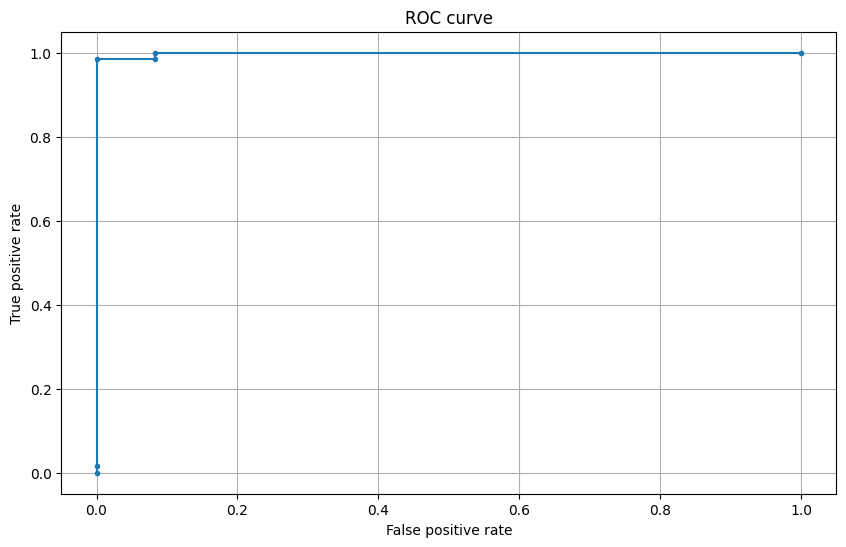

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

pipeline.fit(X_train, y_train)

# probabilities for the test set
y_probs = pipeline.predict_proba(X_test)[:, 1]

# calculating ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid()
plt.show()


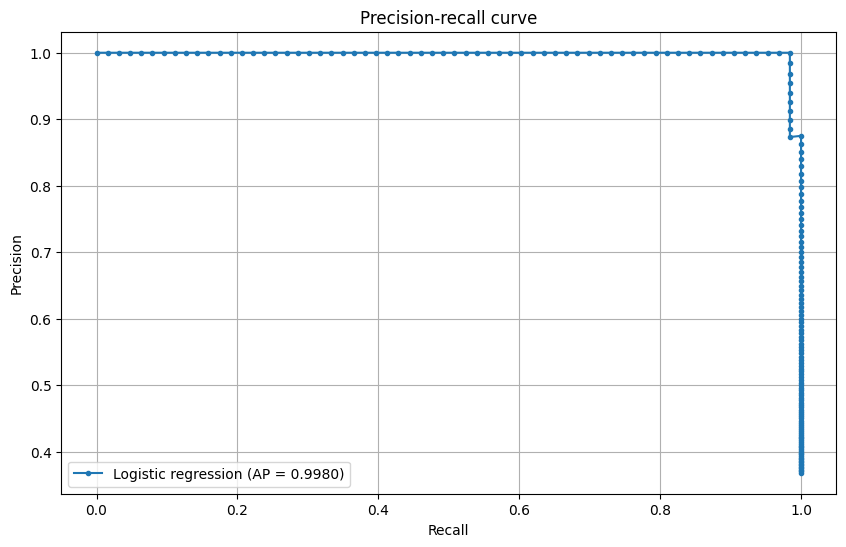

In [32]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)


plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Logistic regression (AP = %0.4f)' % average_precision_score(y_test, y_probs))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.grid()
plt.show()


## feature importance

In [66]:

feature_names = [name for name in data.columns]
print(feature_names)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [68]:
adjusted_feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                           'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
                           'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
                           'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
                           'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                           'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                           'symmetry_worst', 'fractal_dimension_worst']

# coefficients from the logistic model
coefficients = pipeline.named_steps['logistic'].coef_[0]

# dataframe for feature importance
feature_importance = pd.DataFrame({
    'Feature': adjusted_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)
threshold = 0.2

filtered_features = feature_importance[np.abs(feature_importance['Coefficient']) > threshold]

print(filtered_features)


                    Feature  Coefficient
21            texture_worst     0.546014
10                radius_se     0.484413
7       concave points_mean     0.481586
20             radius_worst     0.465878
28           symmetry_worst     0.449607
27     concave points_worst     0.448079
23               area_worst     0.445464
26          concavity_worst     0.416216
22          perimeter_worst     0.415539
13                  area_se     0.377615
6            concavity_mean     0.371923
1              texture_mean     0.358368
24         smoothness_worst     0.351936
3                 area_mean     0.348016
12             perimeter_se     0.345936
0               radius_mean     0.330894
2            perimeter_mean     0.320340
4           smoothness_mean     0.150664
25        compactness_worst     0.123611
17        concave points_se     0.112523
29  fractal_dimension_worst     0.083135
14            smoothness_se     0.067115
8             symmetry_mean     0.032381
11              

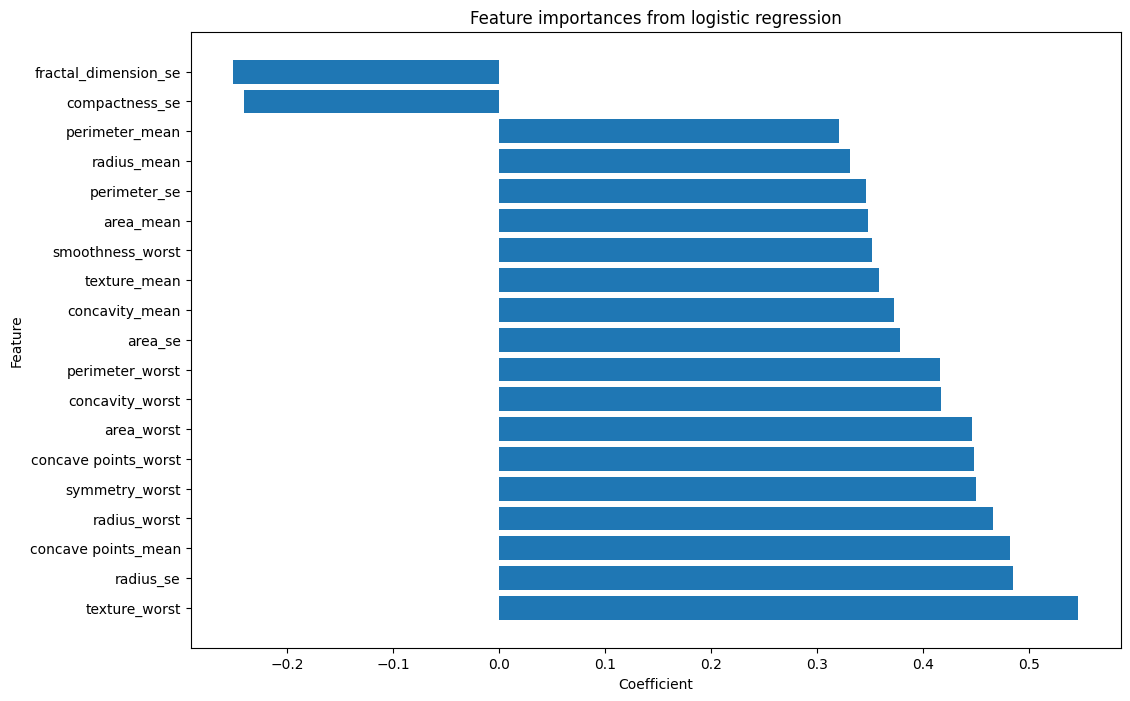

In [65]:
import matplotlib.pyplot as plt

## sorting features
feature_importance_sorted = filtered_features.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(filtered_features['Feature'], filtered_features['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature importances from logistic regression')

plt.show()